<font color = '#FF9900'><b><h1>Amazon Sales Analysis</h1></b></font>

---

### <font color = 'red'><b>Importing the Required Libraries</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <font color = 'green'>Loading the Dataset</font>

In [2]:
df = pd.read_csv("Amazon Sales data.csv")

In [3]:
df.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
20,Europe,Norway,Baby Food,Online,L,5/14/2014,819028031,6/28/2014,7450,255.28,159.42,1901836.00,1187679.00,714157.00
85,North America,Mexico,Personal Care,Offline,L,2/17/2012,430915820,3/20/2012,6422,81.73,56.67,524870.06,363934.74,160935.32
15,Europe,Bulgaria,Clothes,Online,M,4/23/2012,972292029,6/3/2012,1673,109.28,35.84,182825.44,59960.32,122865.12
68,Europe,Lithuania,Office Supplies,Offline,H,10/24/2010,166460740,11/17/2010,8287,651.21,524.96,5396577.27,4350343.52,1046233.75
72,Sub-Saharan Africa,Democratic Republic of the Congo,Beverages,Online,C,5/26/2011,585920464,7/15/2011,5741,47.45,31.79,272410.45,182506.39,89904.06


### <font color = 'green'>Checking is there still any NULL value in the Dataset</font>

In [4]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### <font color = 'green'>A quick Short Summary of the DATASET</font>

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### <font color = 'green'>Converting all the Column names to Lower Case for simplicity in further process</font>

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')

In [9]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### <font color = 'green'>Converting the order_date and ship_date to datetime Formate</font>

In [10]:
# df['order_date'] = df['order_date'].astype('datetime64[ns]')
# df['ship_date'] = df['ship_date'].astype('datetime64[ns]')


df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])


#### <font color = 'blue'>Again cheking the type of each column</font>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          100 non-null    object        
 1   country         100 non-null    object        
 2   item_type       100 non-null    object        
 3   sales_channel   100 non-null    object        
 4   order_priority  100 non-null    object        
 5   order_date      100 non-null    datetime64[ns]
 6   order_id        100 non-null    int64         
 7   ship_date       100 non-null    datetime64[ns]
 8   units_sold      100 non-null    int64         
 9   unit_price      100 non-null    float64       
 10  unit_cost       100 non-null    float64       
 11  total_revenue   100 non-null    float64       
 12  total_cost      100 non-null    float64       
 13  total_profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

# <font color = 'blue'><b>Visualizing the Dataset</b></font>

In [12]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [13]:
# Total profit
total_profit = df['total_profit'].sum()
print(f'Total profit: ${total_profit}')

Total profit: $44168198.39999999


In [14]:
# Total Cost
total_cost = df['total_cost'].sum()
print(f'Total cost: ${total_cost}')

Total cost: $93180569.91000001


In [15]:
# Total revenue
total_revenue = df['total_revenue'].sum()
print(f'Total revenue: ${total_revenue}')

Total revenue: $137348768.31


In [16]:
# Average unit price 
average_unit_price = df['unit_price'].mean()
print(f'Average unit price: ${average_unit_price}')

Average unit price: $276.7613


In [17]:
# Average unit cost
average_unit_cost = df['unit_cost'].mean()
print(f'Average unit cost: ${average_unit_cost}')

Average unit cost: $191.048


In [18]:
# Total units sold of all categories
total_units_sold = df['units_sold'].sum()
print(f'Total units sold: {total_units_sold}')

Total units sold: 512871


### <font color = 'dodgerblue'><b>Year Wise Sales Trend</b></font>
##### In which year Amazon had made Maximum Revenue and in which year it's Revenue is Minimum 

In [19]:
# Adding Year and Month column from the order_date column in the dataset 
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\2702061332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, ax=ax[0], palette="Set1")


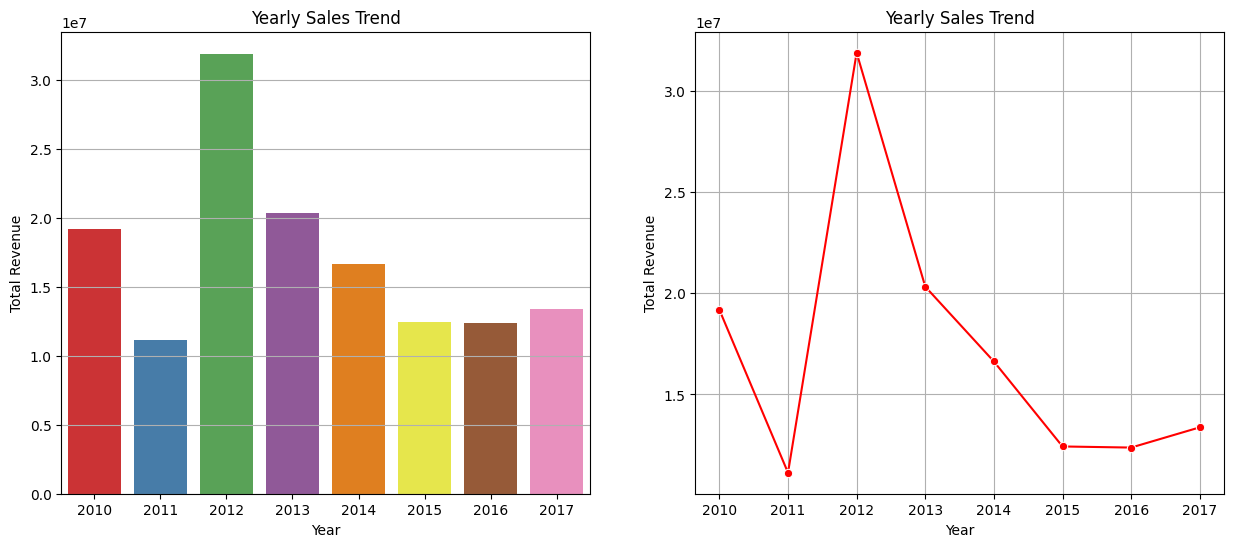

In [20]:
# Creating bar graph of the sales to see in which year the sales were the highest and lowest

yearly_sales = df.groupby('year')['total_revenue'].sum()
# plt.figure(figsize=(10, 6))
# sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette="Set1")

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, ax=ax[0], palette="Set1")
ax[0].set_title('Yearly Sales Trend')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Revenue')
ax[0].grid(axis='y')


sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=ax[1], marker='o', color='r')
ax[1].set_title('Yearly Sales Trend')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Revenue')
plt.xticks(yearly_sales.index)  # Set x-ticks to all years in the index
ax[1].grid(True)


From the above graph we can easily see that Amazon has made Maximum Revenue in the year 2012 and Minimum Revenue in the year 2011.
it is evident that the revenue has seen a significant increase in 2012 compared to 2011. This indicates a successful year for Amazon with a substantial growth in sales. 

### <font color = 'violet'><b>Month Wise Sales Trend</b></font>

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\3621531403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, ax=ax[0], palette="Set1")


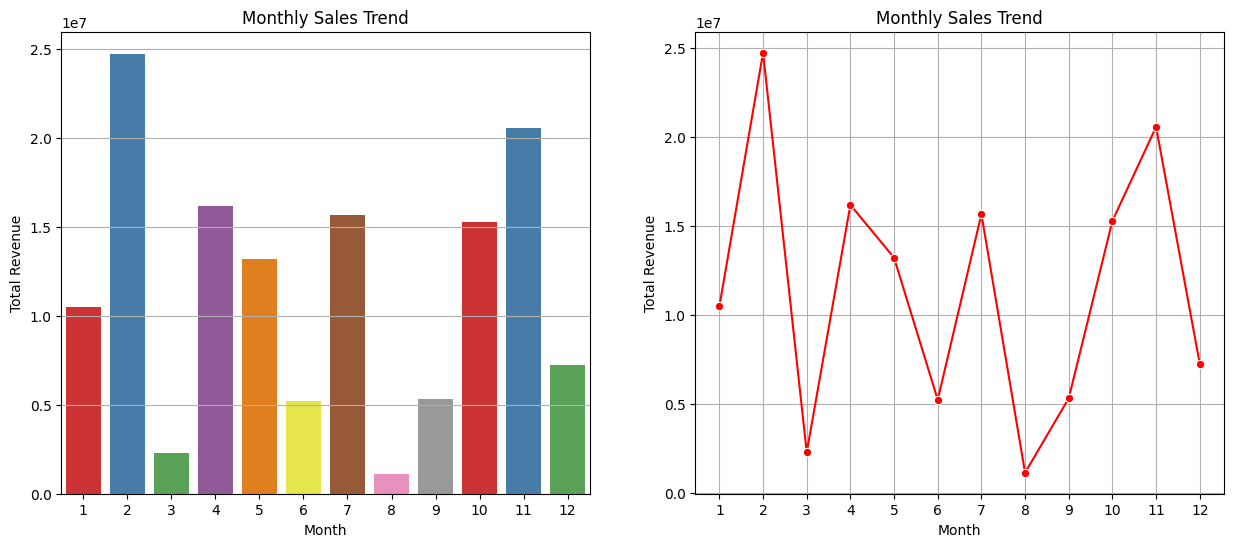

In [21]:
# Creating bar graph of the sales to see in which month of the year the sales were the highest and lowest

monthly_sales = df.groupby('month')['total_revenue'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, ax=ax[0], palette="Set1")
ax[0].set_title('Monthly Sales Trend')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Revenue')
ax[0].grid(axis='y')


sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax[1], marker='o', color='r')
ax[1].set_title('Monthly Sales Trend')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Revenue')
plt.xticks(monthly_sales.index)  # Set x-ticks to all years in the index
ax[1].grid(True)


C:\Users\khans\AppData\Local\Temp\ipykernel_4228\4119632476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_revenue_by_channel.index, y = total_revenue_by_channel.values, palette="Set1")


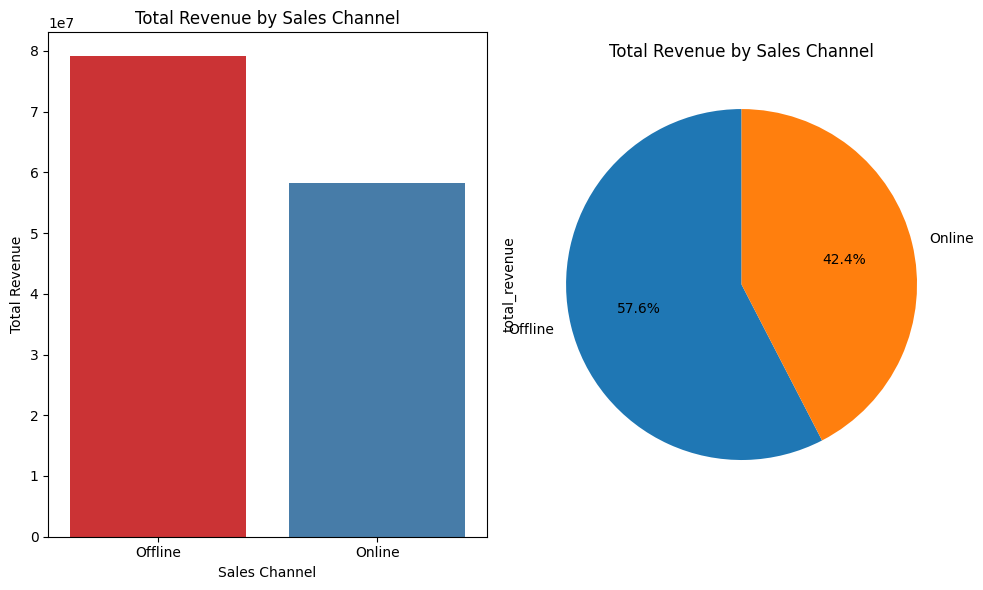

In [22]:
# Total Revenue by Sales Channel
total_revenue_by_channel = df.groupby('sales_channel')['total_revenue'].sum()
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = total_revenue_by_channel.index, y = total_revenue_by_channel.values, palette="Set1")
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
total_revenue_by_channel.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 6))
plt.title('Total Revenue by Sales Channel')
plt.tight_layout()

57.6% of the Revenue is coming from the Offline channel.


###### All available palettes in Seaborn ['husl', 'husl', 'dark', 'bright', 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind', 'colorblind10', 'Set2', 'Set3', 'Set1', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Paired', 'Set2', 'Set3', 'Accent', 'Dark2', 'Set1', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Set2', 'Set3', 'Accent', 'Dark2', 'Paired', 'Set1', 'pastel', 'bright', 'dark', 'muted', 'vlag', 'rocket']

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\2058110668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_revenue_by_region.index, y = total_revenue_by_region.values, palette="Dark2")


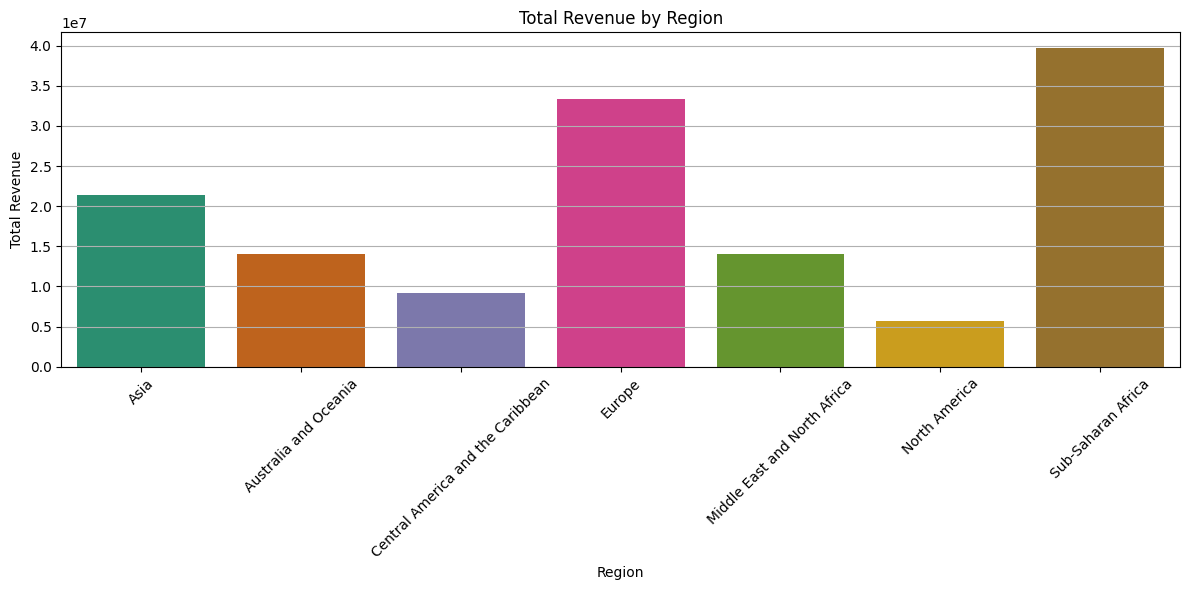

In [23]:
# Total Revenue by Region

total_revenue_by_region = df.groupby('region')['total_revenue'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x = total_revenue_by_region.index, y = total_revenue_by_region.values, palette="Dark2")
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

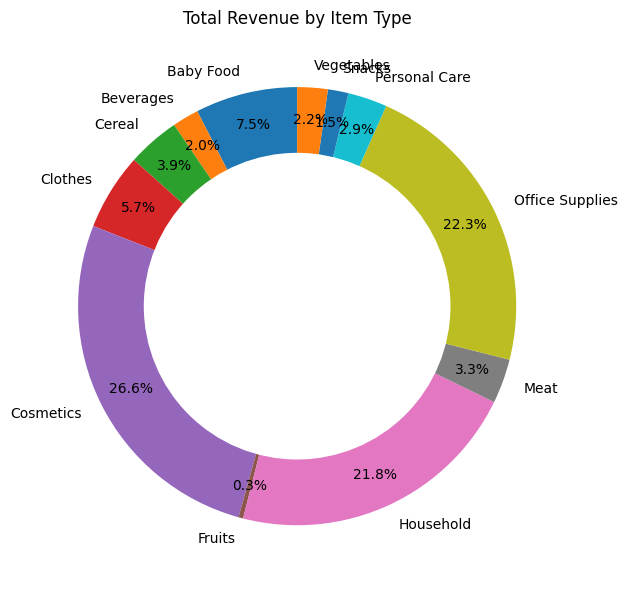

In [48]:
# Donut chart to show percentage of total revenue by each product item

total_revenue_by_item_type = df.groupby('item_type')['total_revenue'].sum()
plt.figure(figsize=(10, 6))

plt.pie(total_revenue_by_item_type, labels=total_revenue_by_item_type.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Total Revenue by Item Type')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

Upon analyzing the above figure, it is evident that Amazon generates the highest revenue from the Sub-Saharan Africa region, followed by Europe. Conversely, North America contributes the least to Amazon's revenue.

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\162450266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_profit_by_region.index, y = total_profit_by_region.values, palette="Set1")


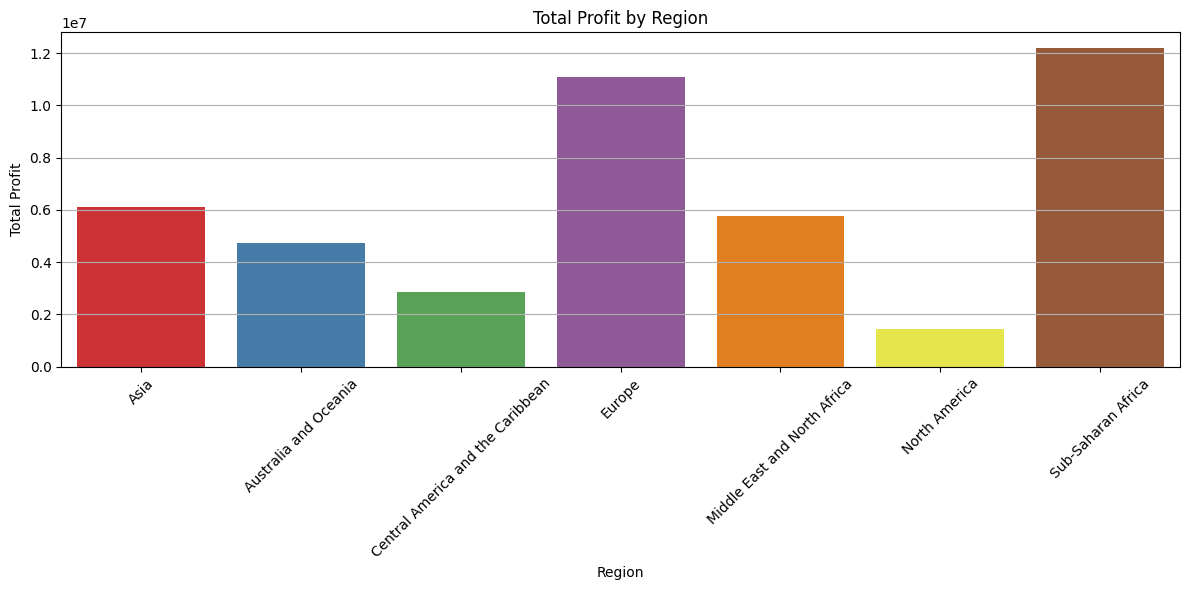

In [24]:
# Total Profit by Region

total_profit_by_region = df.groupby('region')['total_profit'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x = total_profit_by_region.index, y = total_profit_by_region.values, palette="Set1")
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\2940311120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_profit_by_country.index, y = total_profit_by_country.values, palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Djibouti'),
  Text(1, 0, 'Myanmar'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Samoa '),
  Text(4, 0, 'Honduras'),
  Text(5, 0, 'Iceland'),
  Text(6, 0, 'Azerbaijan'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Rwanda')])

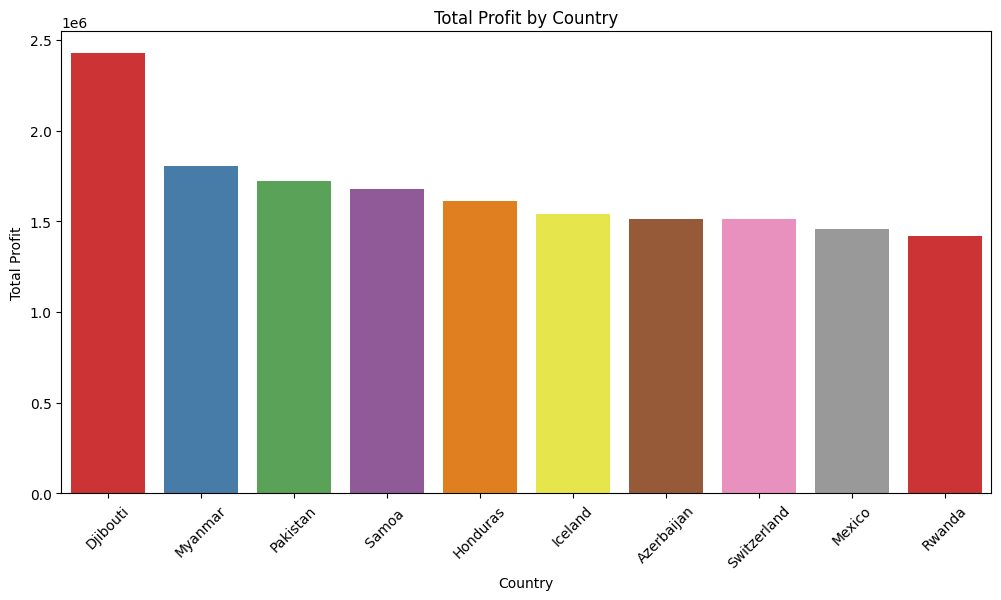

In [25]:
# Total Profit by Country

total_profit_by_country = df.groupby('country')['total_profit'].sum().sort_values(ascending=False).head(10) # taking top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x = total_profit_by_country.index, y = total_profit_by_country.values, palette="Set1")
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.xticks(rotation=45)

From the graph of total profit by country, we can observe that Djibouti has the highest total profit followed by Myanmar and Pakistan. This indicates that these countries are the top performers in terms of generating profit for Amazon. On the other hand, countries like Rwanda, Mexico, and Switzerland have comparatively lower total profits. This could be due to various factors such as lower sales volume, higher operating costs, or lower selling prices in these countries.

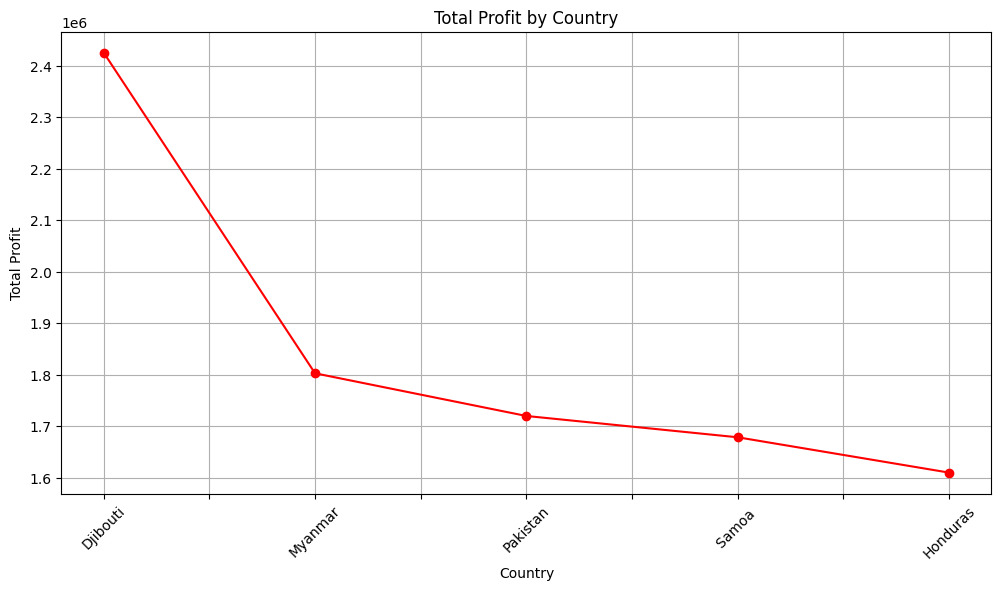

In [30]:
# Line plot Total Profit by Country

total_profit_by_country = df.groupby('country')['total_profit'].sum().sort_values(ascending=False).head(5) # taking top 10 countries
plt.figure(figsize=(12, 6))
total_profit_by_country.plot(kind='line', marker='o', color='r')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.xticks(rotation=45)
plt.grid(True)

Text(0.5, 1.0, 'Profit by Sales Channel')

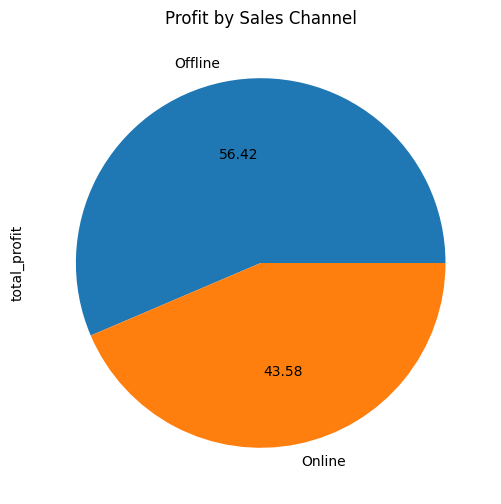

In [27]:
# Profit by Sales Channel

profit_by_sales_channel = df.groupby('sales_channel')['total_profit'].sum()
profit_by_sales_channel.plot.pie(autopct = "%1.2f", figsize=(10, 6))
plt.title('Profit by Sales Channel')

We can observe that the maximum profit is generated from Offline sales channel, than online channel.  

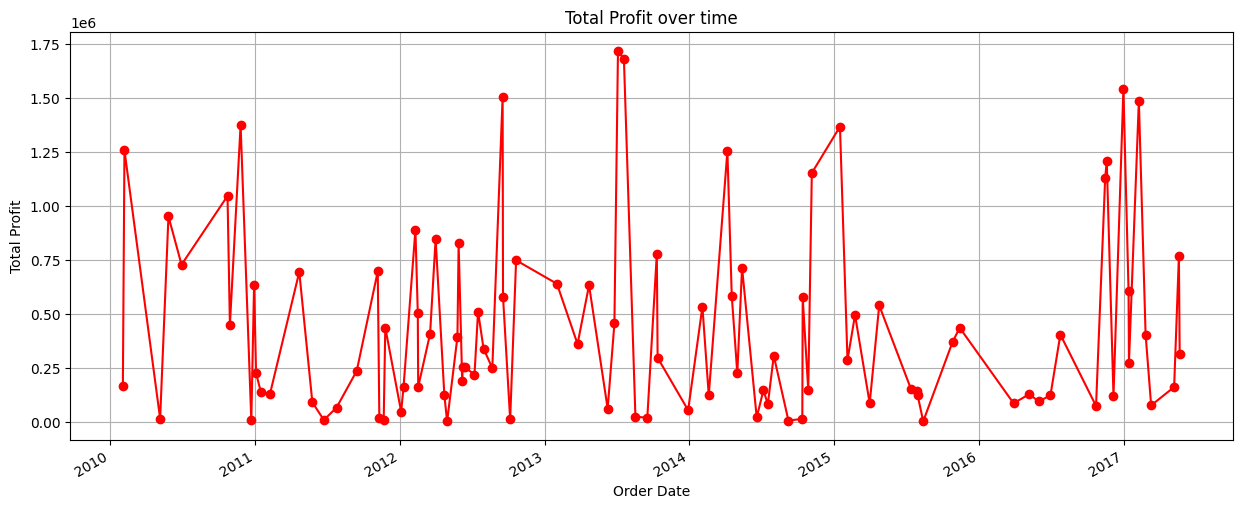

In [31]:
# Total profit generated over time

total_profit_over_time = df.groupby('order_date')['total_profit'].sum()
plt.figure(figsize=(15, 6))
total_profit_over_time.plot(kind='line', marker='o', color='r')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.title('Total Profit over time')
plt.grid(True)

<Figure size 1600x800 with 0 Axes>

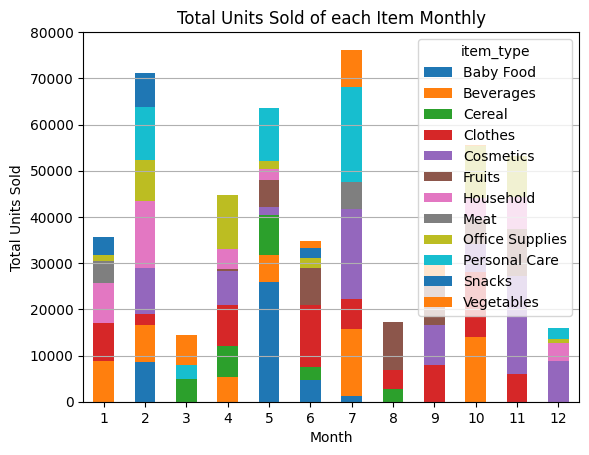

In [38]:
# Total units solf of each product item monthly

total_units_sold_monthly = df.groupby(['month', 'item_type'])['units_sold'].sum().unstack()
plt.figure(figsize=(16, 8))
total_units_sold_monthly.plot(kind='bar', stacked=True)
plt.title('Total Units Sold of each Item Monthly')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')

With this graph we can easily visualize in which month which type of product is sold more and which is less. For example in the month of july "Personal Care" products are sold more than any other type of product and snacks are sold very less.

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\1034646549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_units_sold_item_type.index, y = total_units_sold_item_type.values, palette="Set1")


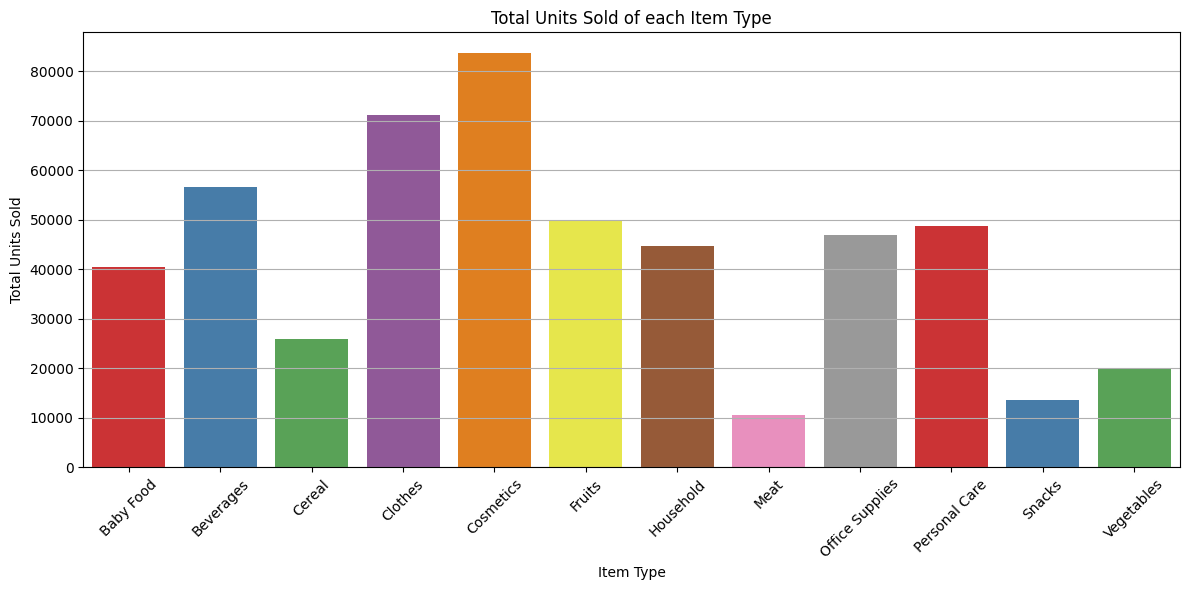

In [39]:
# Total units sold of each item type

total_units_sold_item_type = df.groupby('item_type')['units_sold'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x = total_units_sold_item_type.index, y = total_units_sold_item_type.values, palette="Set1")
plt.title('Total Units Sold of each Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

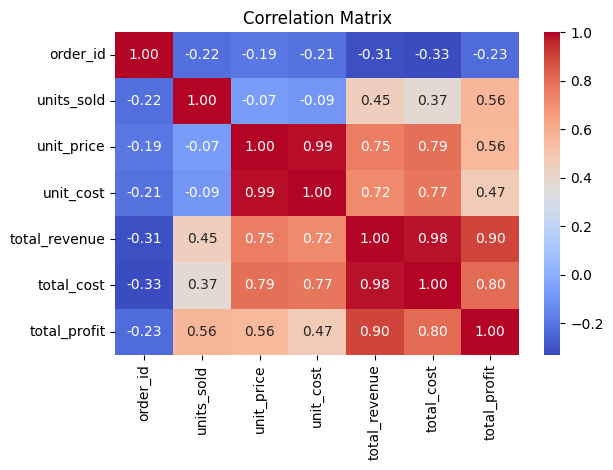

In [41]:
# Metrics and Relationships between the variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

Text(0.5, 1.0, 'Order Priority')

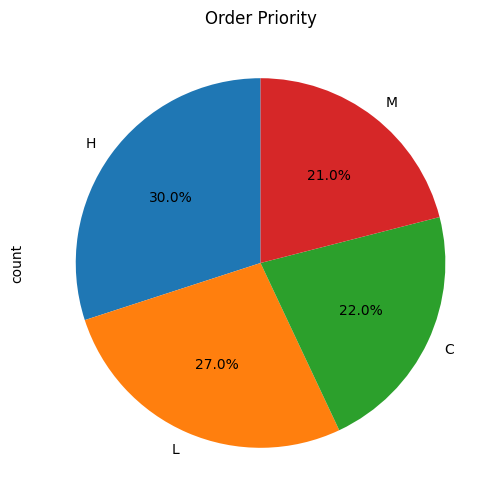

In [43]:
# Pie chart of Order priority

# H : High Priority
# L : Low Priority
# M : Medium Priority
# C : Critical Priority

order_priority = df['order_priority'].value_counts()
plt.figure(figsize=(10, 6))
order_priority.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 6))
plt.title('Order Priority')

High priority orders are max in counts followed by Low priority and critical priority orders.

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\3619638464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_cost_by_region.index, y = total_cost_by_region.values, palette="Set1")


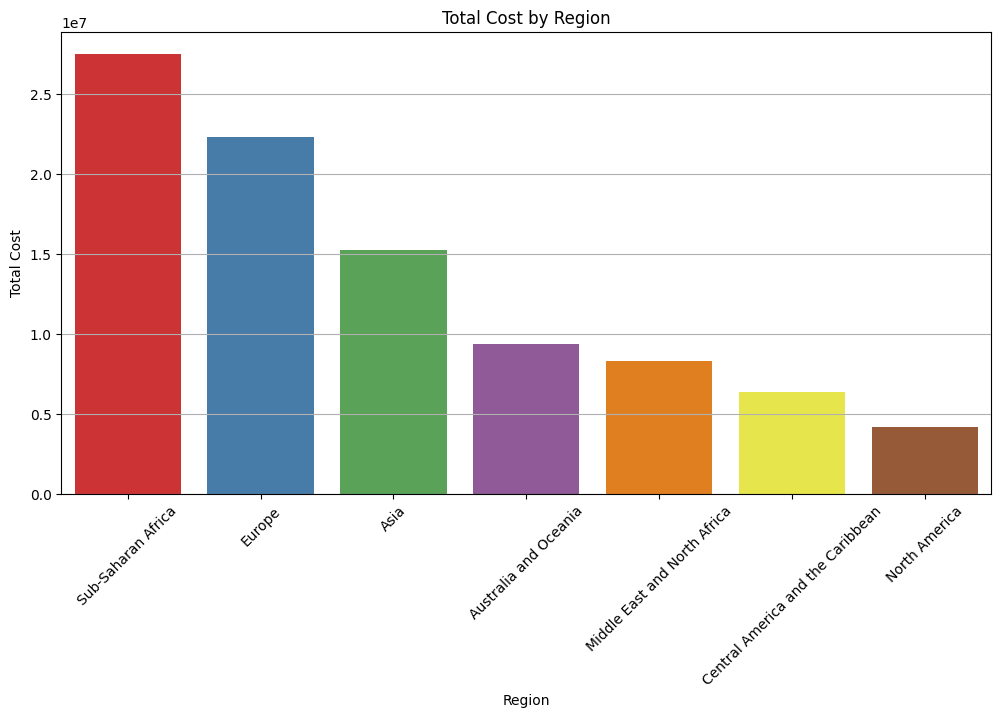

In [46]:
# Total cost by region
total_cost_by_region = df.groupby('region')['total_cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x = total_cost_by_region.index, y = total_cost_by_region.values, palette="Set1")
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.title('Total Cost by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')

The Sub-Saharan Africa has the highest cost followed by Europe and asia

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\2602332635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_cost_by_country.index, y = total_cost_by_country.values, palette="Set1")


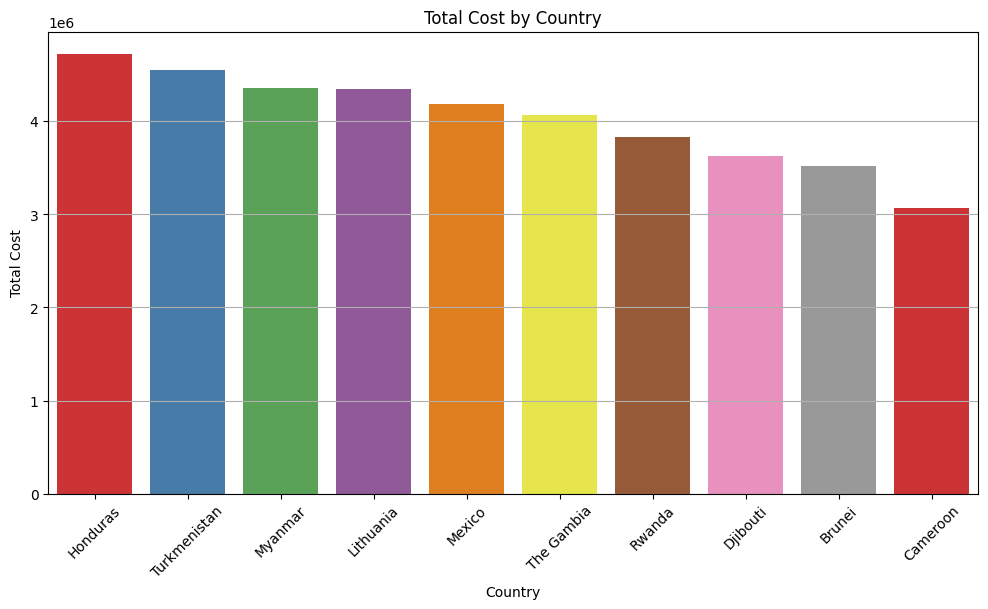

In [47]:
# Sum of total cost by country

total_cost_by_country = df.groupby('country')['total_cost'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x = total_cost_by_country.index, y = total_cost_by_country.values, palette="Set1")
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.title('Total Cost by Country')
plt.xticks(rotation=45)
plt.grid(axis='y')

From the graph, we can observe that Honduras has the highest total cost among all the countries, followed by Turkmenistan, Myanmar, Lithuania, and Mexico. These countries have significantly higher total costs compared to the other countries in the dataset.

C:\Users\khans\AppData\Local\Temp\ipykernel_4228\1443127637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_cost_by_channel.index, y = total_cost_by_channel.values, palette='Set1')


<Axes: xlabel='sales_channel'>

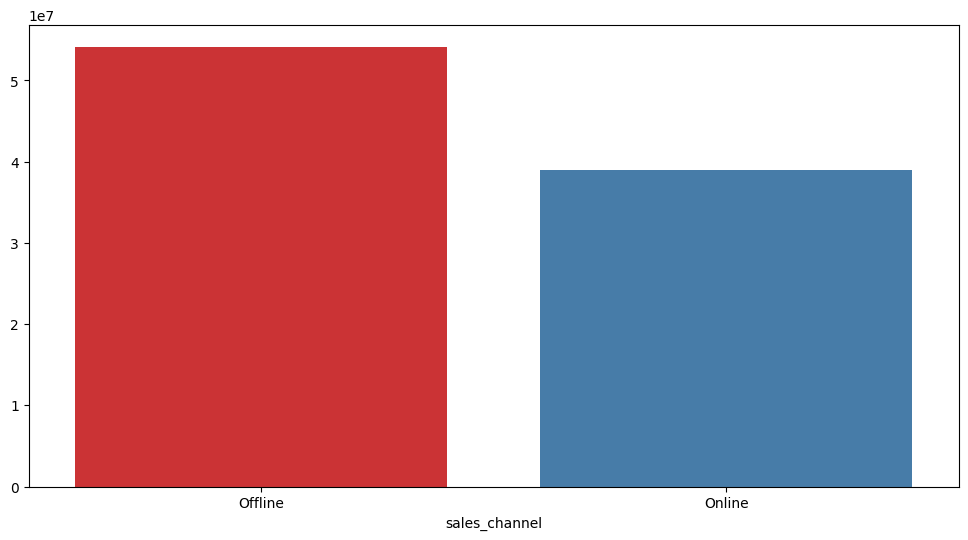

In [54]:
# Total cost by sales channel

total_cost_by_channel = df.groupby('sales_channel')['total_cost'].sum()
plt.figure(figsize=(12, 6))

sns.barplot(x = total_cost_by_channel.index, y = total_cost_by_channel.values, palette='Set1')

Text(0.5, 1.0, 'Total Cost by Sales Channel')

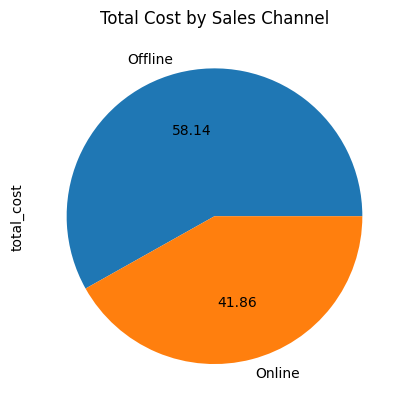

In [56]:

total_cost_by_channel.plot.pie(autopct = '%1.2f')
plt.title('Total Cost by Sales Channel')